# Import Libraries

In [14]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import PIL
import tensorflow_hub as hub

## **load_image** function to convert image to Tensors, decode to RGB color channel, Convert data type to float, resize to fixed default size (512,512)

In [2]:
def load_image(image, image_size = (512,512)):
  img = tf.io.read_file(image)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio = True)
  img = img[tf.newaxis, :]
  return img

In [3]:
from google.colab import files

In [4]:
upload = files.upload()

Saving style_image.jpg to style_image.jpg
Saving Stoic-02.webp to Stoic-02.webp


In [ ]:
style = upload

In [ ]:
content = upload

In [9]:
original_image = load_image('/content/David-Goggins-Workout.jpg')

In [10]:
original_image.shape

TensorShape([1, 429, 512, 3])

In [7]:
style_image = load_image("/content/style_image.jpg")

In [8]:
style_image.shape

TensorShape([1, 403, 512, 3])

In [11]:
def imshow(image,title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis = 0)
  plt.imshow(image)
  if title:
    plt.title(title)

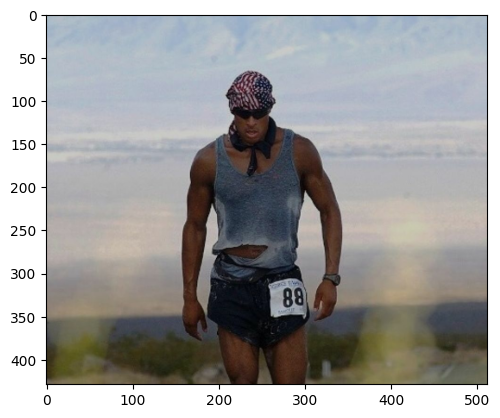

In [18]:
imshow(original_image)

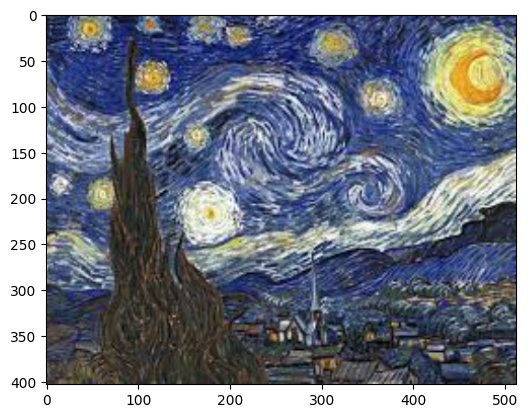

In [19]:
imshow(style_image)

https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization

check this link for documentation

Image Stylization pre trained DL model that creates a new image using style format from one image and apply it in another image

In [15]:

#use magenta style arbitrary stylization NN
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [16]:
outputs = hub_module(original_image, style_image)
stylized_image = outputs[0]

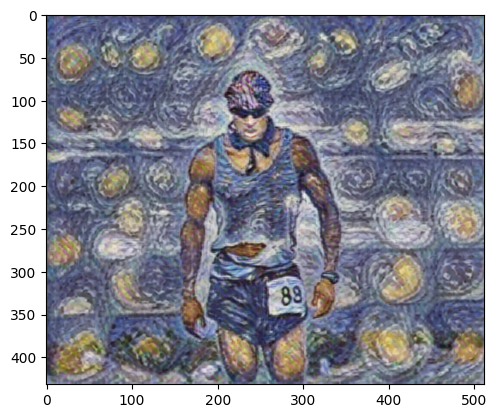

In [17]:
imshow(stylized_image)